In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display
%matplotlib inline
sns.set_style('whitegrid')

# Load dataset
df = pd.read_csv("C:/Users/hp/Desktop/Dasboards/realtor-data.zip.csv", header=0)  
df.head()
    

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
df.describe(include='all')


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
count,2.221849e+06,2226382,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2224975,2226374,2.226083e+06,1.657898e+06,1492085
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,20098,55,NaN,NaN,14954
top,NaN,for_sale,NaN,NaN,NaN,NaN,NaN,Houston,Florida,NaN,NaN,2022-03-31
freq,NaN,1389306,NaN,NaN,NaN,NaN,NaN,23862,249432,NaN,NaN,17171
mean,5.293989e+04,NaN,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,NaN,NaN,5.218668e+04,2.714471e+03,NaN
std,3.064275e+04,NaN,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,NaN,NaN,2.895408e+04,8.081635e+05,NaN
min,0.000000e+00,NaN,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,4.000000e+00,NaN
25%,2.386100e+04,NaN,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,NaN,NaN,2.961700e+04,1.300000e+03,NaN
50%,5.288400e+04,NaN,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,NaN,NaN,4.838200e+04,1.760000e+03,NaN
75%,7.918300e+04,NaN,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,NaN,NaN,7.807000e+04,2.413000e+03,NaN


In [7]:
df.isnull().sum()


brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [64]:
# Create house_size categories
df['house_size_category'] = pd.qcut(df['house_size'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
print("Created 'house_size_category' based on house_size quantiles.")

# Create acre_lot categories
# Handle cases where acre_lot might be 0 or very small, which can cause issues with qcut if not enough unique values
# or if qcut tries to create bins from identical values.
try:
    df['acre_lot_category'] = pd.qcut(df['acre_lot'], q=4, labels=['Small Lot', 'Medium Lot', 'Large Lot', 'Very Large Lot'], duplicates='drop')
    print("Created 'acre_lot_category' based on acre_lot quantiles.")
except Exception as e:
    print(f"Could not create 'acre_lot_category' with 4 quantiles, trying fewer: {e}")
    try:
        df['acre_lot_category'] = pd.qcut(df['acre_lot'], q=3, labels=['Small Lot', 'Medium Lot', 'Large Lot'], duplicates='drop')
        print("Created 'acre_lot_category' with 3 quantiles.")
    except Exception as e:
        print(f"Could not create 'acre_lot_category' with 3 quantiles, creating simple bins: {e}")
        bins = [0, 0.1, 0.5, 1, df['acre_lot'].max()]
        labels = ['Tiny Lot', 'Small Lot', 'Medium Lot', 'Large Lot']
        df['acre_lot_category'] = pd.cut(df['acre_lot'], bins=bins, labels=labels, include_lowest=True, right=True)


# Calculate price per square foot (handle division by zero if house_size can be 0)
df['price_per_sqft'] = df.apply(lambda row: row['price'] / row['house_size'] if row['house_size'] > 0 else 0, axis=1)
print("Calculated 'price_per_sqft'.")

# Calculate time since last sold (in days)
current_date = pd.to_datetime('2025-07-19') # Using a fixed date for consistency, or pd.Timestamp.now()
df['time_since_last_sold_days'] = (current_date - df['prev_sold_date']).dt.days
print("Calculated 'time_since_last_sold_days'.")


Created 'house_size_category' based on house_size quantiles.
Created 'acre_lot_category' based on acre_lot quantiles.
Calculated 'price_per_sqft'.
Calculated 'time_since_last_sold_days'.


In [14]:
# Summary statistics
df_clean.describe()

# Unique values by key columns
print("States:", df_clean['state'].nunique())
print("Cities:", df_clean['city'].nunique())
print("Status values:", df_clean['status'].value_counts())


States: 54
Cities: 17598
Status values: status
for_sale    972630
sold        731364
Name: count, dtype: int64


In [16]:
# Price categories
bins = [0, 100000, 300000, 600000, 1000000, np.inf]
labels = ['<100k', '100k-300k', '300k-600k', '600k-1M', '1M+']
df_clean["price_range"] = pd.cut(df_clean["price"], bins=bins, labels=labels)

# House size categories
size_bins = [0, 1000, 2000, 3000, 4000, np.inf]
size_labels = ['Tiny', 'Small', 'Medium', 'Large', 'Very Large']
df_clean["size_category"] = pd.cut(df_clean["house_size"], bins=size_bins, labels=size_labels)


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\2387083064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["price_range"] = pd.cut(df_clean["price"], bins=bins, labels=labels)
C:\Users\hp\AppData\Local\Temp\ipykernel_10824\2387083064.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["size_category"] = pd.cut(df_clean["house_size"], bins=size_bins, labels=size_labels)


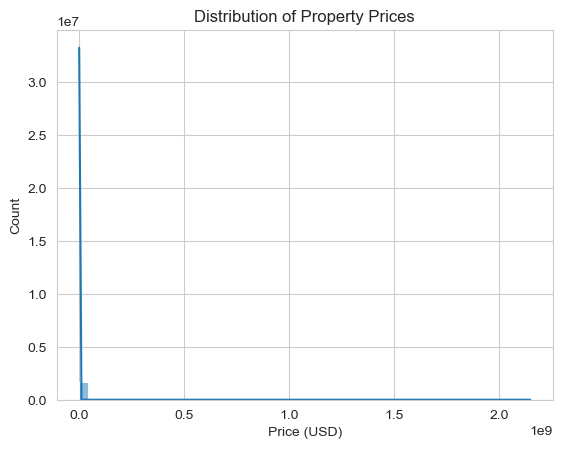

In [18]:
sns.histplot(df_clean["price"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\2334996223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


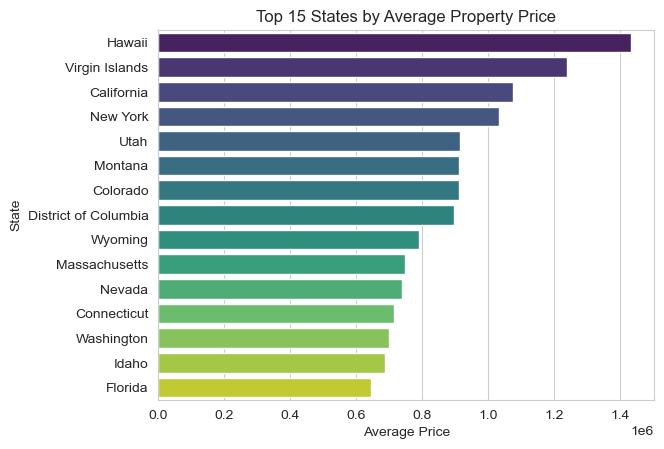

In [20]:
top_states = df_clean.groupby("state")["price"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 15 States by Average Property Price")
plt.xlabel("Average Price")
plt.ylabel("State")
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


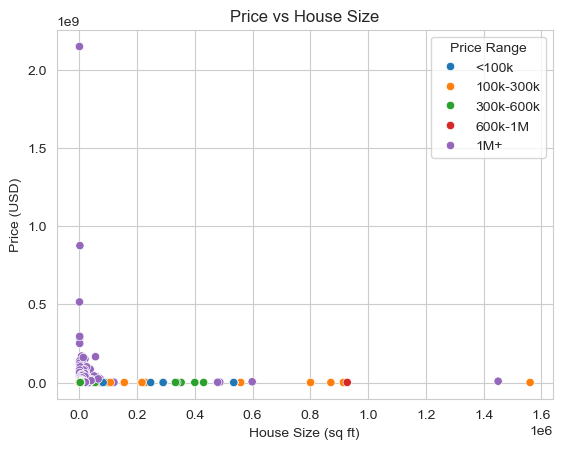

In [22]:
sns.scatterplot(data=df_clean, x="house_size", y="price", hue="price_range")
plt.title("Price vs House Size")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price (USD)")
plt.legend(title="Price Range")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\3623832709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x="price_range", palette="Set2")


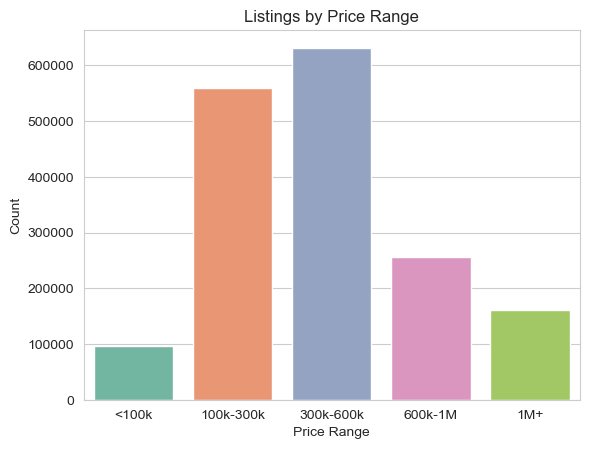

In [24]:
sns.countplot(data=df_clean, x="price_range", palette="Set2")
plt.title("Listings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


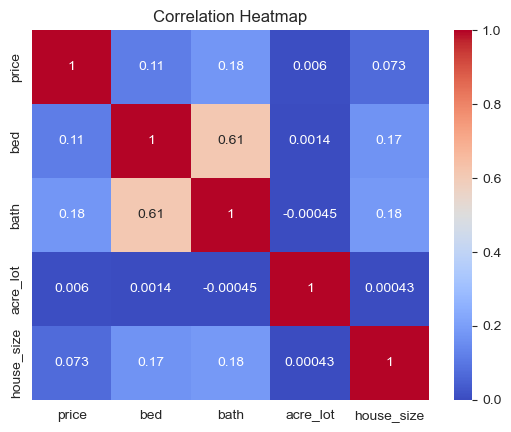

In [26]:
corr = df_clean[["price", "bed", "bath", "acre_lot", "house_size"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


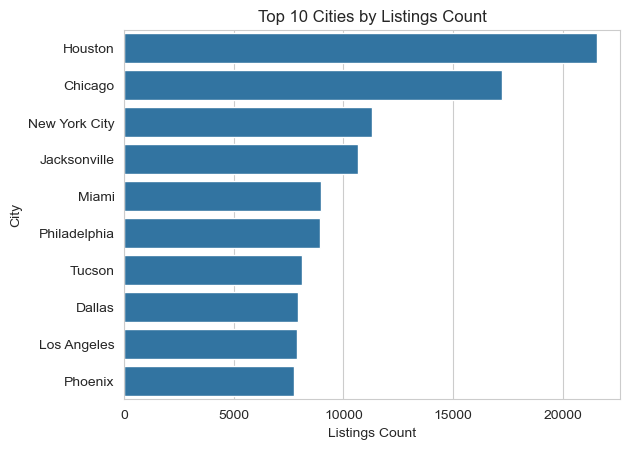

In [28]:
# Top cities with most listings
top_cities = df_clean["city"].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Listings Count")
plt.xlabel("Listings Count")
plt.ylabel("City")
plt.show()


In [30]:
# Most expensive states
expensive_states = df_clean.groupby("state")["price"].mean().sort_values(ascending=False).head(5)
print("Most Expensive States:\n", expensive_states)

# Median price by bed count
median_price_beds = df_clean.groupby("bed")["price"].median()
print("Median Price by Bedrooms:\n", median_price_beds)


Most Expensive States:
 state
Hawaii            1.432044e+06
Virgin Islands    1.240423e+06
California        1.074707e+06
New York          1.034062e+06
Utah              9.158832e+05
Name: price, dtype: float64
Median Price by Bedrooms:
 bed
1.0       269000.0
2.0       275000.0
3.0       329900.0
4.0       459900.0
5.0       640000.0
           ...    
190.0     189000.0
212.0    1695000.0
222.0     699000.0
444.0     435000.0
473.0     225000.0
Name: price, Length: 93, dtype: float64


In [38]:
# --- 3. Data Cleaning and Preprocessing ---

# Convert 'prev_sold_date' to datetime, coercing errors to NaT (Not a Time)
print("\n--- Data Cleaning and Preprocessing ---")
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')
print(f"Converted 'prev_sold_date' to datetime. NaT count: {df['prev_sold_date'].isnull().sum()}")

# Drop rows where 'price' is missing, as it's a key target variable
initial_rows = df.shape[0]
df.dropna(subset=['price'], inplace=True)
print(f"Dropped {initial_rows - df.shape[0]} rows with missing 'price'. Remaining rows: {df.shape[0]}")

# Impute numerical columns with median (more robust to outliers)
numerical_cols_to_impute = ['bed', 'bath', 'acre_lot', 'house_size']
for col in numerical_cols_to_impute:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed '{col}' with median value: {median_val}")



--- Data Cleaning and Preprocessing ---
Converted 'prev_sold_date' to datetime. NaT count: 734298
Dropped 1541 rows with missing 'price'. Remaining rows: 2224841
Imputed 'bed' with median value: 3.0
Imputed 'bath' with median value: 2.0
Imputed 'acre_lot' with median value: 0.26
Imputed 'house_size' with median value: 1760.0


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\714916046.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [40]:
# Impute categorical columns with mode
categorical_cols_to_impute = ['city', 'state', 'brokered_by', 'zip_code'] # brokered_by and zip_code are float but can be treated as categorical for imputation
for col in categorical_cols_to_impute:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed '{col}' with mode value: {mode_val}")

C:\Users\hp\AppData\Local\Temp\ipykernel_10824\3704780679.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


Imputed 'city' with mode value: Houston
Imputed 'state' with mode value: Florida
Imputed 'brokered_by' with mode value: 22611.0
Imputed 'zip_code' with mode value: 33993.0


In [42]:
# Create price categories
df['price_category'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Luxury'])
print("Created 'price_category' based on price quantiles.")

Created 'price_category' based on price quantiles.


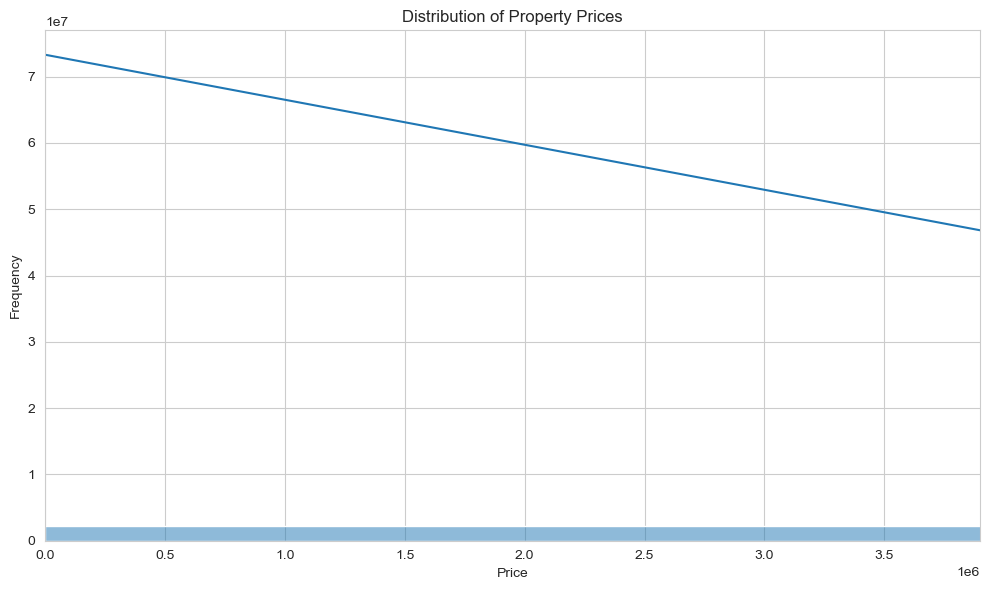

In [44]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99)) # Limit x-axis to remove extreme outliers for better visualization
plt.tight_layout()
plt.show()

In [46]:
# Distribution of Beds, Baths, House Size, Acre Lot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.histplot(df['bed'], bins=df['bed'].nunique(), kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Number of Bedrooms')
axes[0, 0].set_xlabel('Bedrooms')
axes[0, 0].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

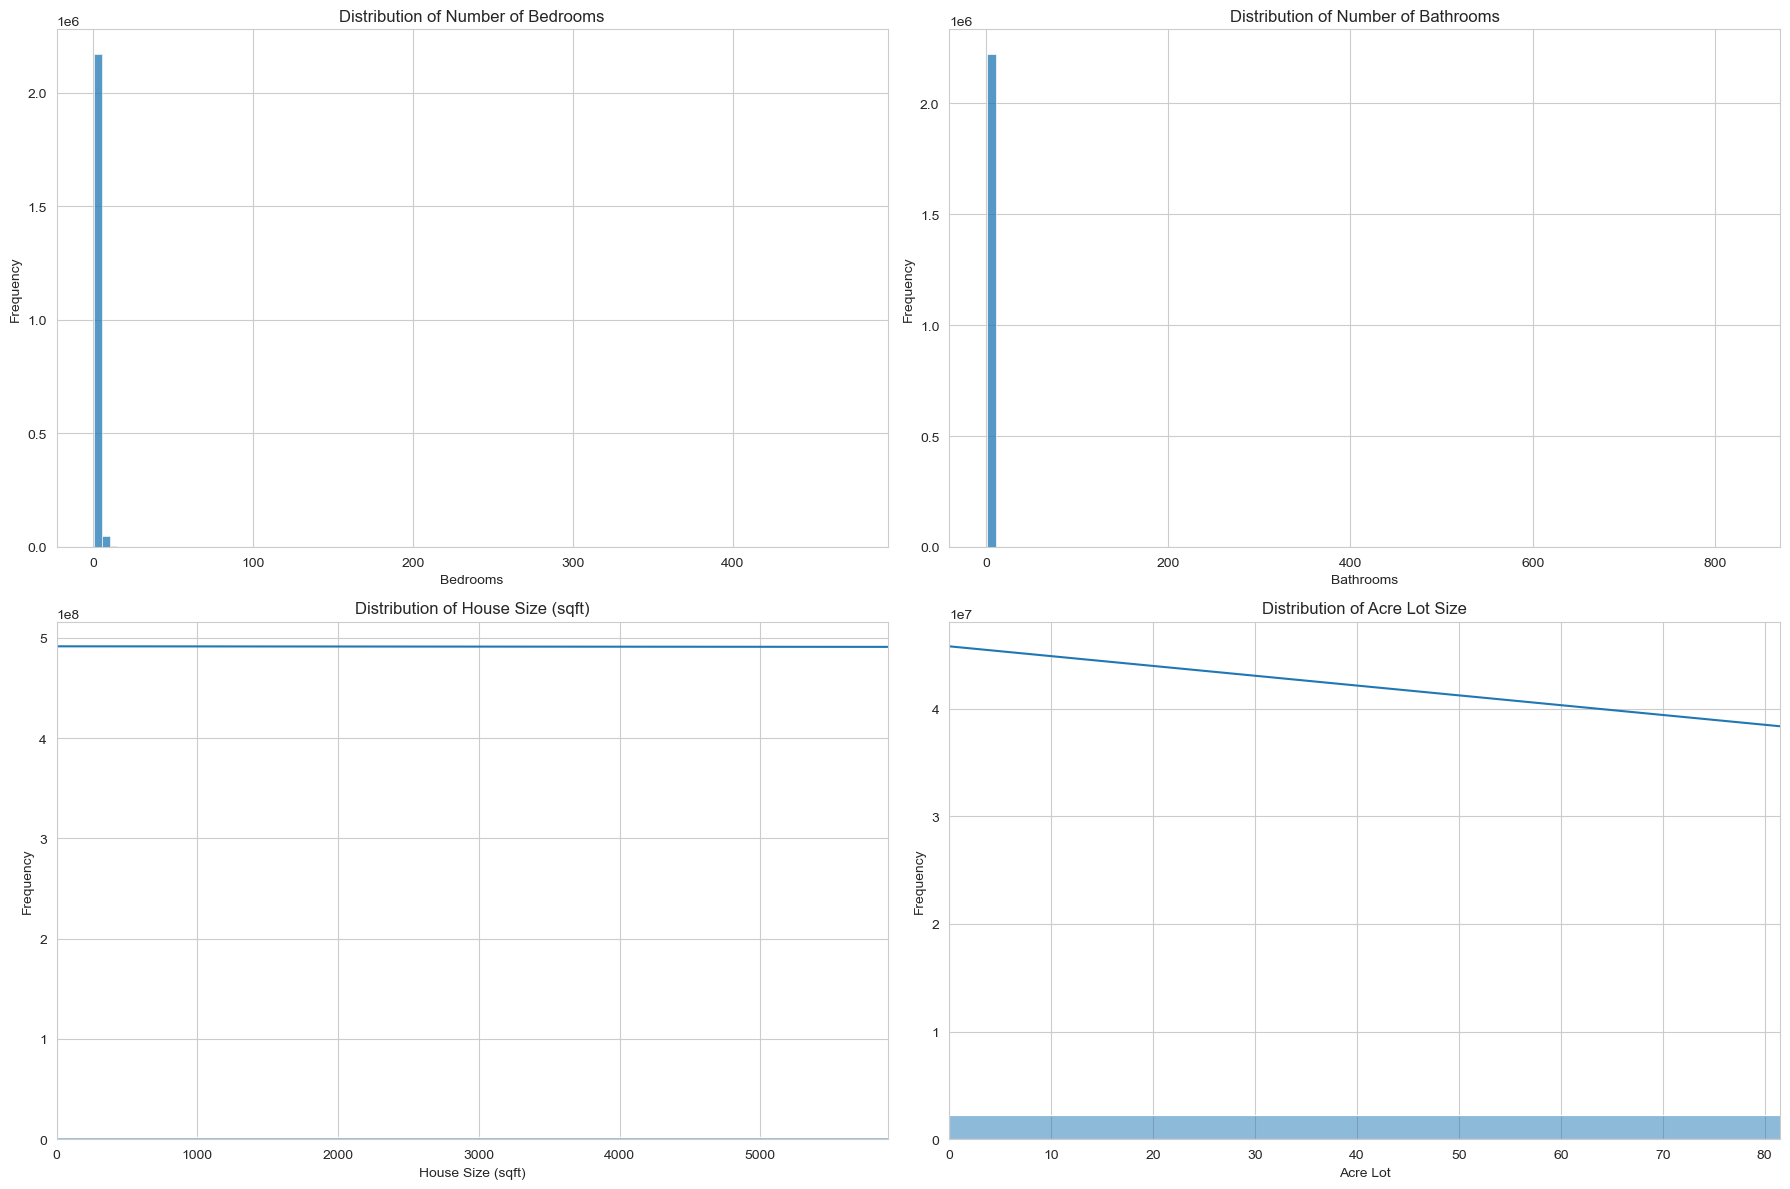

In [48]:
sns.histplot(df['bath'], bins=df['bath'].nunique(), kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Number of Bathrooms')
axes[0, 1].set_xlabel('Bathrooms')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['house_size'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of House Size (sqft)')
axes[1, 0].set_xlabel('House Size (sqft)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(0, df['house_size'].quantile(0.99)) # Limit x-axis

sns.histplot(df['acre_lot'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acre Lot Size')
axes[1, 1].set_xlabel('Acre Lot')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, df['acre_lot'].quantile(0.99)) # Limit x-axis
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\4207461226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', palette='viridis')


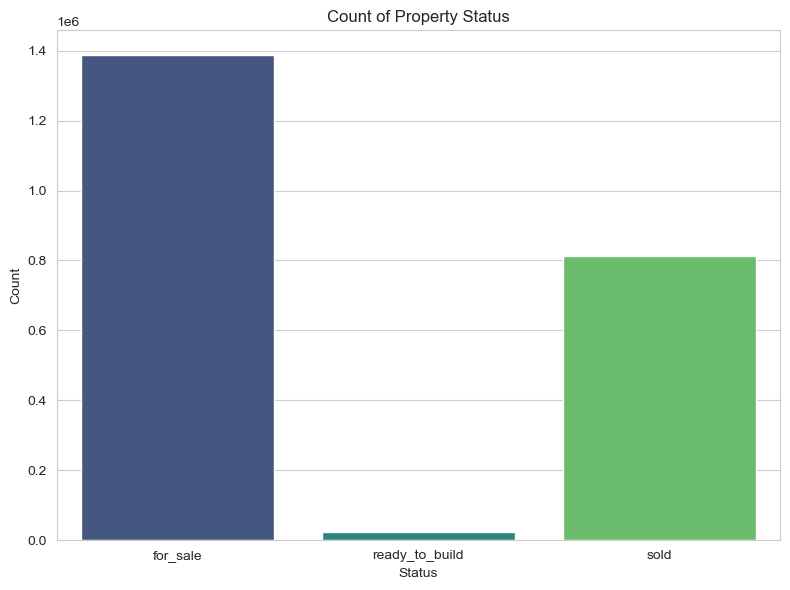

In [50]:
# Count of Property Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status', palette='viridis')
plt.title('Count of Property Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10824\4269978008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='plasma')


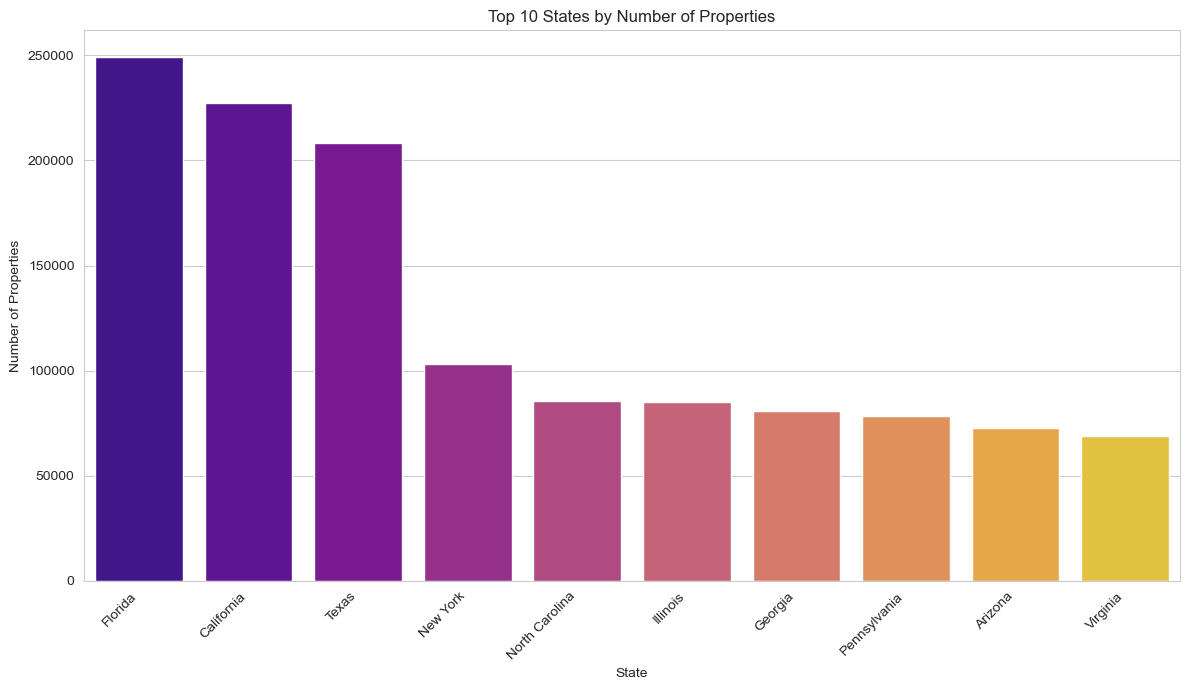

In [52]:
# Top 10 States by Number of Properties
plt.figure(figsize=(12, 7))
top_states = df['state'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='plasma')
plt.title('Top 10 States by Number of Properties')
plt.xlabel('State')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\3908396803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')


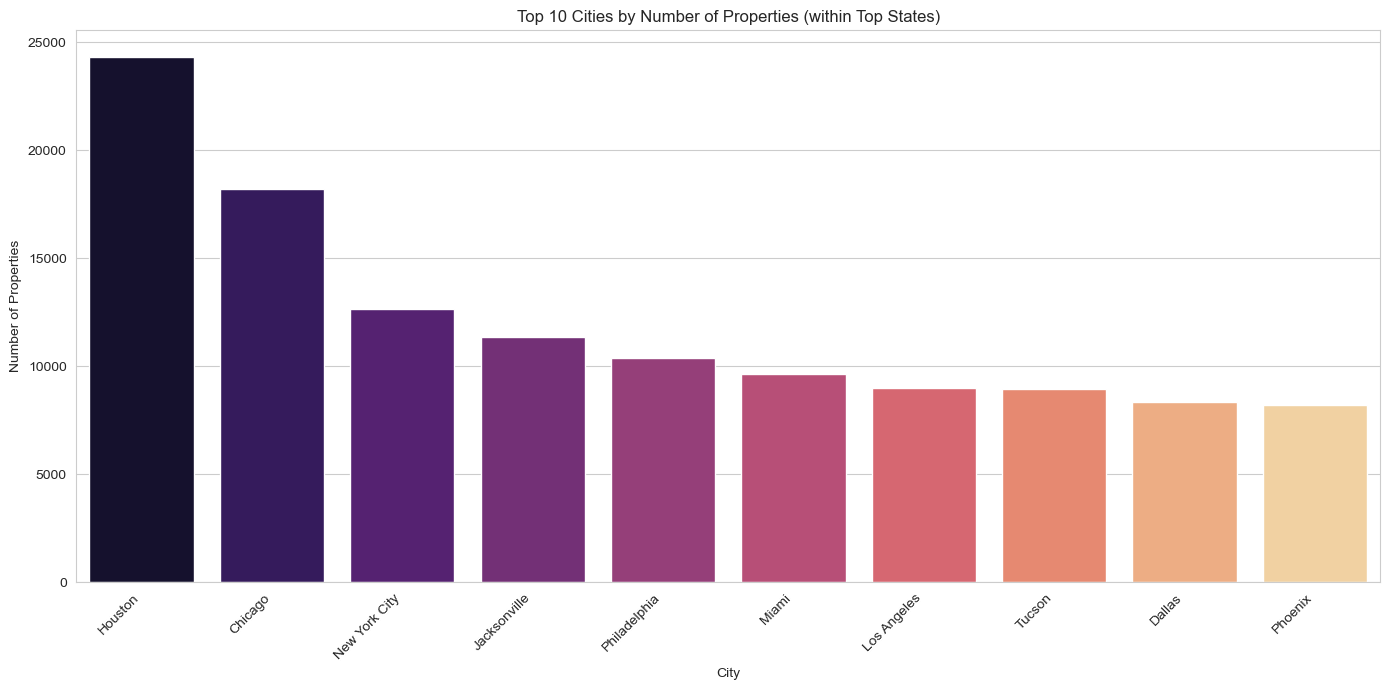

In [54]:
# Top 10 Cities by Number of Properties (within top states for better visibility)
plt.figure(figsize=(14, 7))
# Filter for top states to make the plot more readable
df_top_states = df[df['state'].isin(top_states.index)]
top_cities = df_top_states['city'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')
plt.title('Top 10 Cities by Number of Properties (within Top States)')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10824\2101760699.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


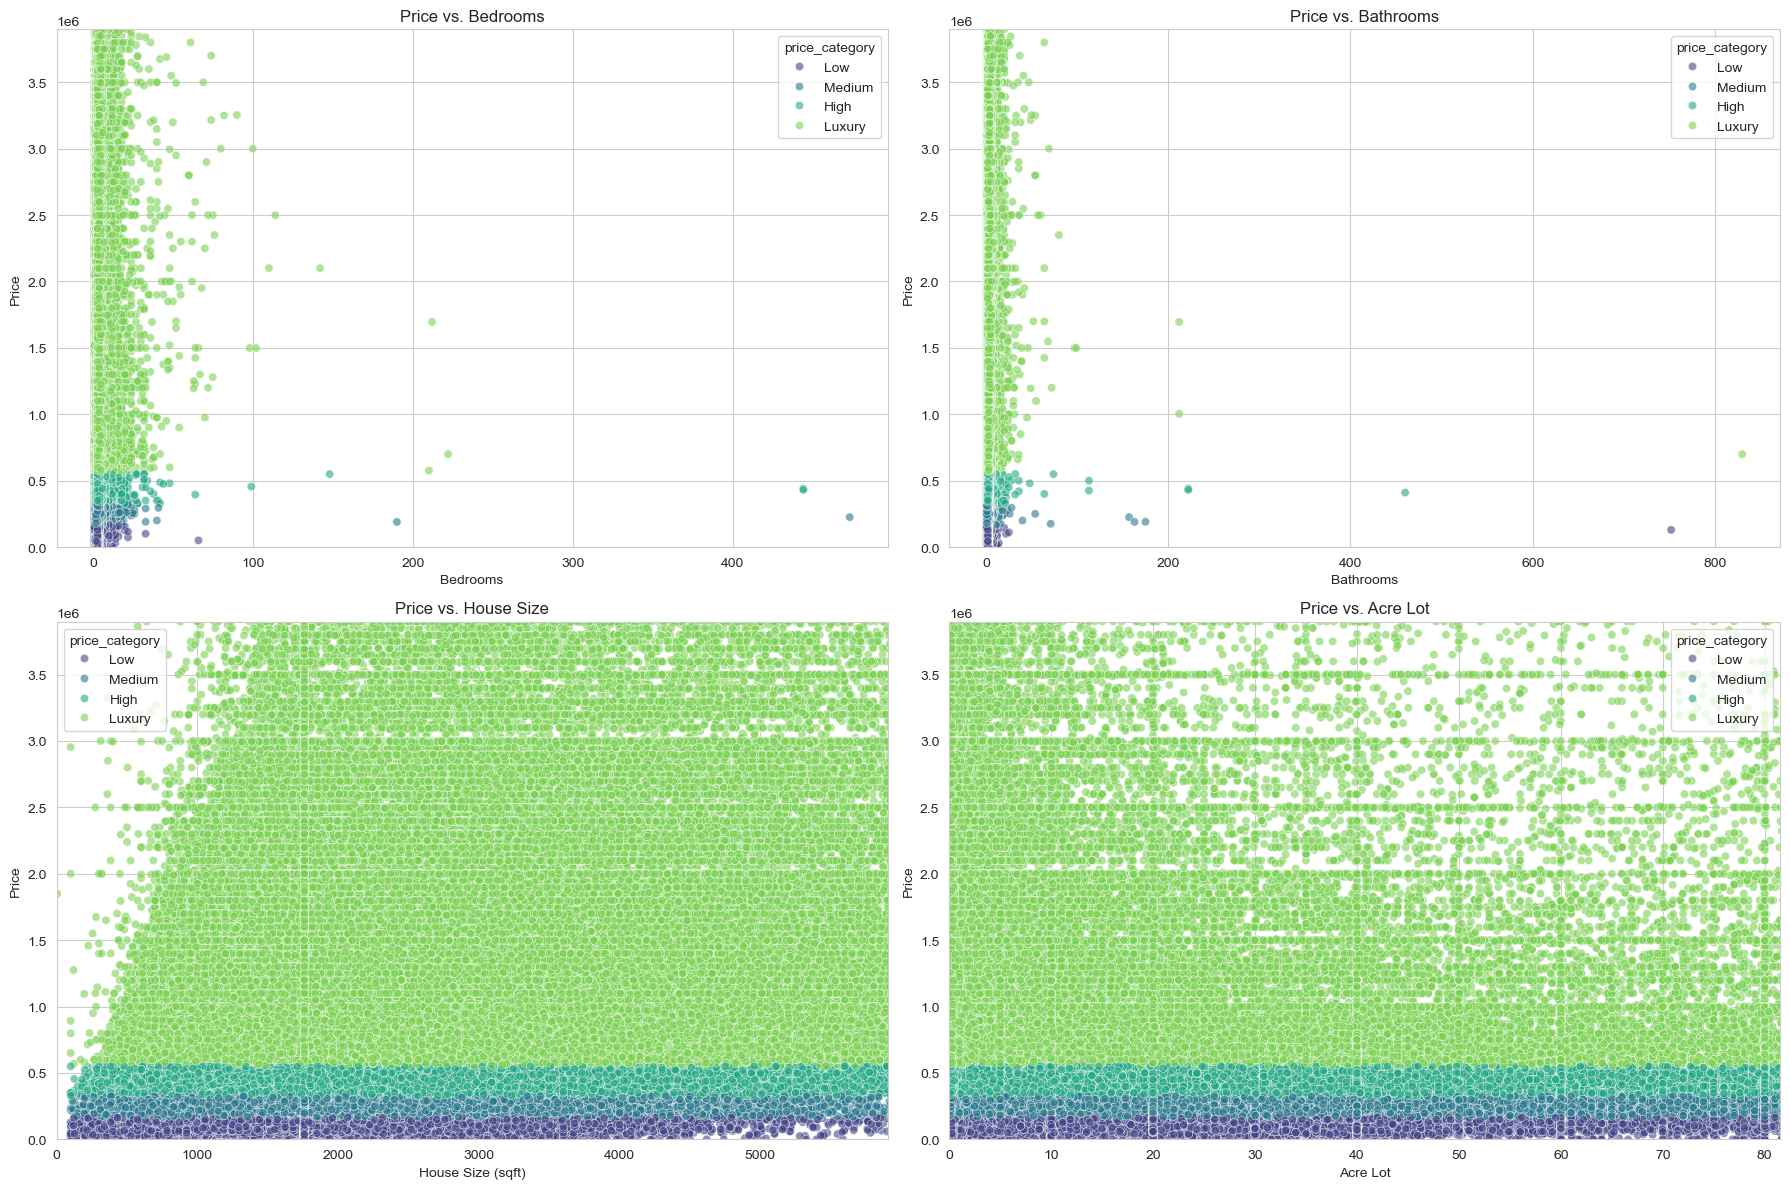

In [56]:
# Price vs. Bedrooms, Bathrooms, House Size, Acre Lot (Scatter Plots)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.scatterplot(data=df, x='bed', y='price', hue='price_category', palette='viridis', ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title('Price vs. Bedrooms')
axes[0, 0].set_xlabel('Bedrooms')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_ylim(0, df['price'].quantile(0.99)) # Limit y-axis

sns.scatterplot(data=df, x='bath', y='price', hue='price_category', palette='viridis', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Price vs. Bathrooms')
axes[0, 1].set_xlabel('Bathrooms')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_ylim(0, df['price'].quantile(0.99)) # Limit y-axis

sns.scatterplot(data=df, x='house_size', y='price', hue='price_category', palette='viridis', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Price vs. House Size')
axes[1, 0].set_xlabel('House Size (sqft)')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_xlim(0, df['house_size'].quantile(0.99)) # Limit x-axis
axes[1, 0].set_ylim(0, df['price'].quantile(0.99)) # Limit y-axis

sns.scatterplot(data=df, x='acre_lot', y='price', hue='price_category', palette='viridis', ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title('Price vs. Acre Lot')
axes[1, 1].set_xlabel('Acre Lot')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_xlim(0, df['acre_lot'].quantile(0.99)) # Limit x-axis
axes[1, 1].set_ylim(0, df['price'].quantile(0.99)) # Limit y-axis
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\2098733861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_category', y='price', palette='cividis')


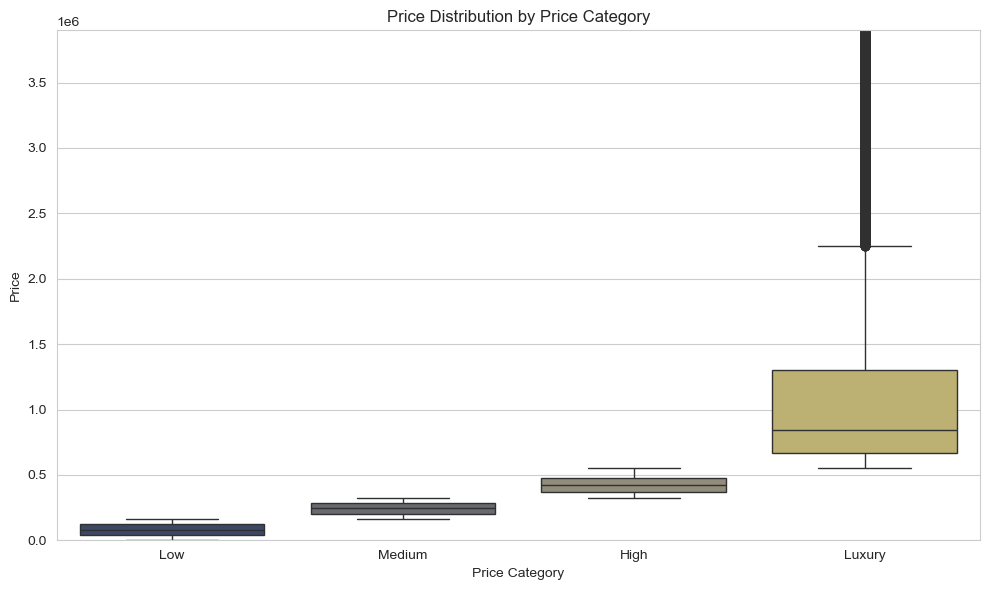

In [57]:
# Box plot of Price by Price Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_category', y='price', palette='cividis')
plt.title('Price Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Price')
plt.ylim(0, df['price'].quantile(0.99)) # Limit y-axis
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\2785968647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='house_size_category', y='price', palette='cubehelix')


<Figure size 1000x600 with 0 Axes>

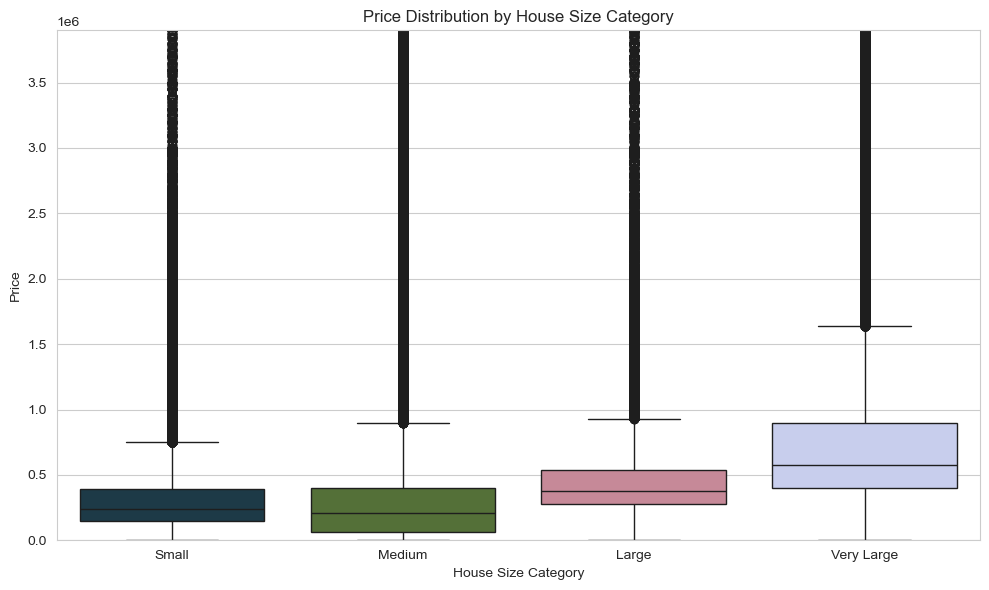

In [65]:
# Box plot of Price by House Size Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='house_size_category', y='price', palette='cubehelix')
plt.title('Price Distribution by House Size Category')
plt.xlabel('House Size Category')
plt.ylabel('Price')
plt.ylim(0, df['price'].quantile(0.99)) # Limit y-axis
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\405211660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='acre_lot_category', y='price', palette='rocket')


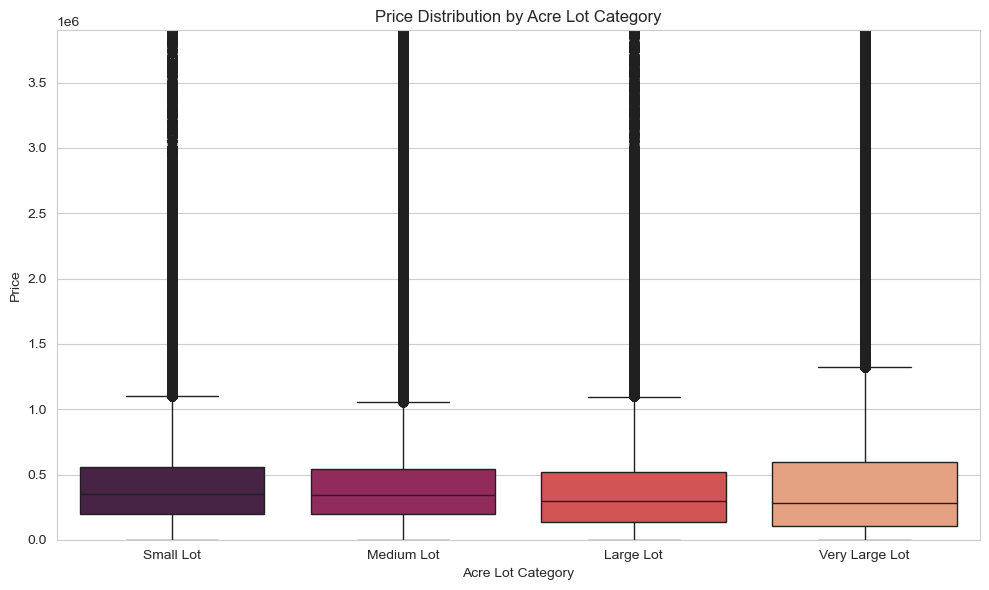

In [68]:
# Box plot of Price by Acre Lot Category
if 'acre_lot_category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='acre_lot_category', y='price', palette='rocket')
    plt.title('Price Distribution by Acre Lot Category')
    plt.xlabel('Acre Lot Category')
    plt.ylabel('Price')
    plt.ylim(0, df['price'].quantile(0.99)) # Limit y-axis
    plt.tight_layout()
    plt.show()


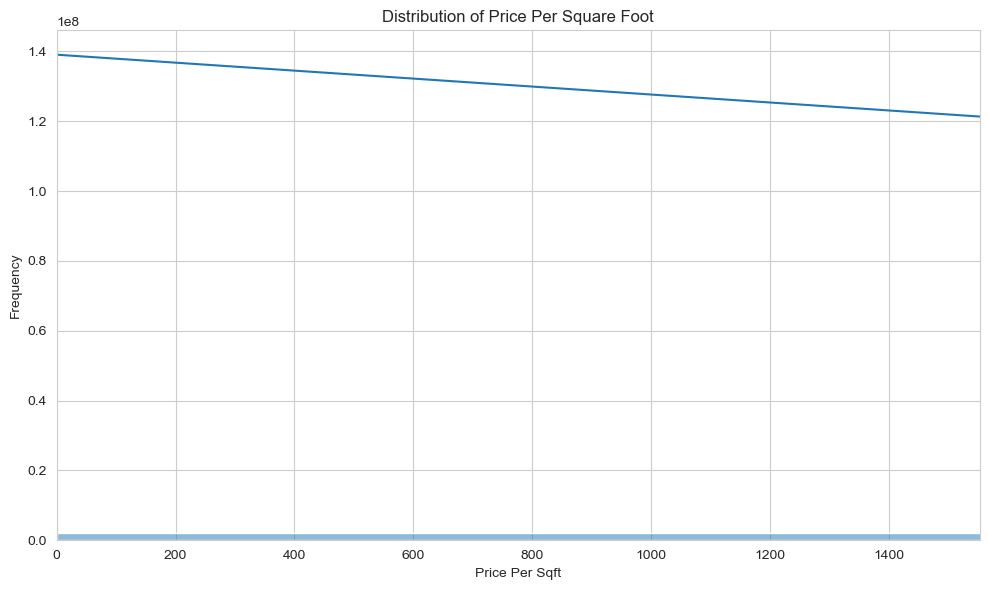

In [70]:
# Price per Sqft Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price Per Square Foot')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.xlim(0, df['price_per_sqft'].quantile(0.99)) # Limit x-axis
plt.tight_layout()
plt.show()


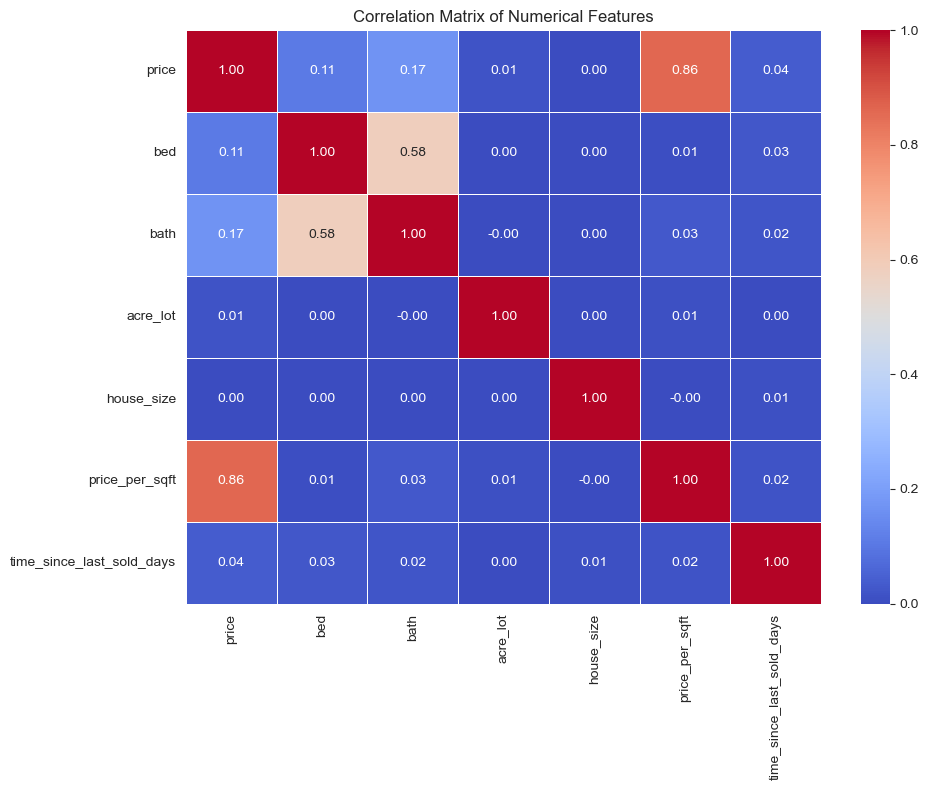

In [72]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)
# Drop columns that are IDs or not meaningful for correlation (e.g., brokered_by, street, zip_code)
numerical_df = numerical_df.drop(columns=['brokered_by', 'street', 'zip_code'], errors='ignore')
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


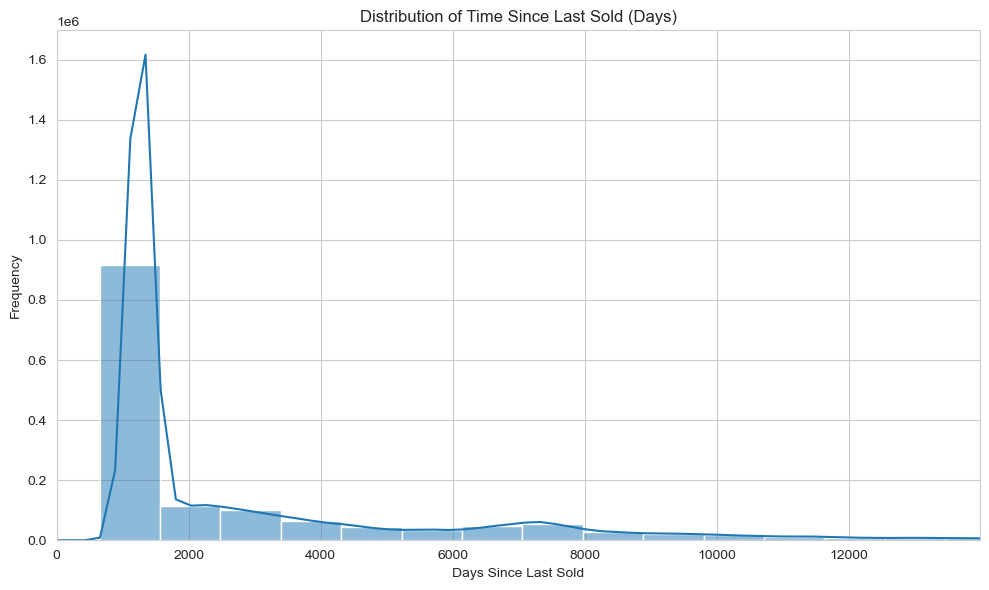

In [75]:
# Analysis of 'prev_sold_date' and 'time_since_last_sold_days'
# Filter out NaT values for plotting
df_sold = df.dropna(subset=['prev_sold_date'])

if not df_sold.empty:
    # Distribution of 'time_since_last_sold_days'
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sold['time_since_last_sold_days'], bins=50, kde=True)
    plt.title('Distribution of Time Since Last Sold (Days)')
    plt.xlabel('Days Since Last Sold')
    plt.ylabel('Frequency')
    plt.xlim(0, df_sold['time_since_last_sold_days'].quantile(0.99)) # Limit x-axis
    plt.tight_layout()
    plt.show()


In [81]:
print("\n--- Deep Analysis Insights ---")
print(f"Average Price: ${df['price'].mean():,.2f}")
print(f"Median Price: ${df['price'].median():,.2f}")
print(f"Average House Size: {df['house_size'].mean():,.2f} sqft")
print(f"Average Acre Lot: {df['acre_lot'].mean():,.2f} acres")



--- Deep Analysis Insights ---
Average Price: $524,195.52
Median Price: $325,000.00
Average House Size: 2,471.17 sqft
Average Acre Lot: 13.03 acres


In [85]:
# Least expensive properties
print("\nTop 5 Least Expensive Properties:")
print(df.sort_values(by='price', ascending=True).head()[['price', 'bed', 'bath', 'house_size', 'acre_lot', 'city', 'state']])



Top 5 Least Expensive Properties:
         price  bed  bath  house_size  acre_lot     city    state
1210450    0.0  2.0   2.0      2173.0      0.26   Peoria  Arizona
1119022    0.0  3.0   2.0      1755.0      0.26  Bastrop    Texas
1119023    0.0  3.0   2.0      1782.0      0.26  Bastrop    Texas
1119024    0.0  3.0   2.0      1586.0      0.26  Bastrop    Texas
1119025    0.0  3.0   2.0      1450.0      0.26  Bastrop    Texas


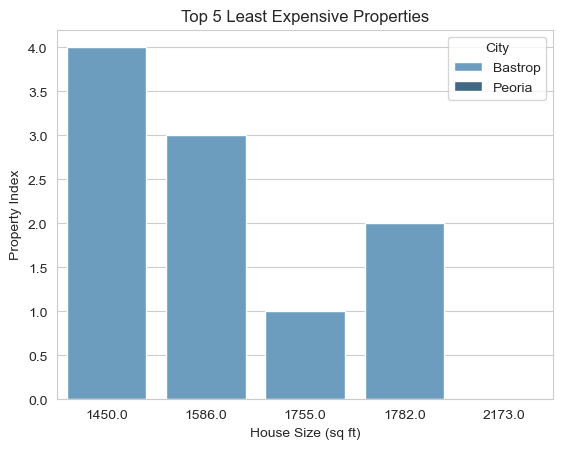

In [99]:
# Manually recreate the data
import pandas as pd

least_expensive = pd.DataFrame({
    'price': [0.0, 0.0, 0.0, 0.0, 0.0],
    'bed': [2.0, 3.0, 3.0, 3.0, 3.0],
    'bath': [2.0, 2.0, 2.0, 2.0, 2.0],
    'house_size': [2173.0, 1755.0, 1782.0, 1586.0, 1450.0],
    'acre_lot': [0.26, 0.26, 0.26, 0.26, 0.26],
    'city': ['Peoria', 'Bastrop', 'Bastrop', 'Bastrop', 'Bastrop'],
    'state': ['Arizona', 'Texas', 'Texas', 'Texas', 'Texas']
})
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x="house_size", 
    y=least_expensive.index, 
    data=least_expensive, 
    hue="city", 
    palette="Blues_d"
)

plt.title("Top 5 Least Expensive Properties")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Property Index")
plt.legend(title="City")
plt.show()


In [87]:
# Average price per state (top 10)
print("\nAverage Price per State (Top 10 by average price):")
avg_price_state = df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)
print(avg_price_state.apply(lambda x: f"${x:,.2f}"))



Average Price per State (Top 10 by average price):
state
Hawaii                  $1,240,095.30
California              $1,029,223.70
New York                  $943,796.82
District of Columbia      $882,849.78
Utah                      $881,418.40
Colorado                  $832,179.28
Montana                   $792,043.24
Virgin Islands            $759,440.05
Massachusetts             $724,824.71
Guam                      $713,861.66
Name: price, dtype: object


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\278103943.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


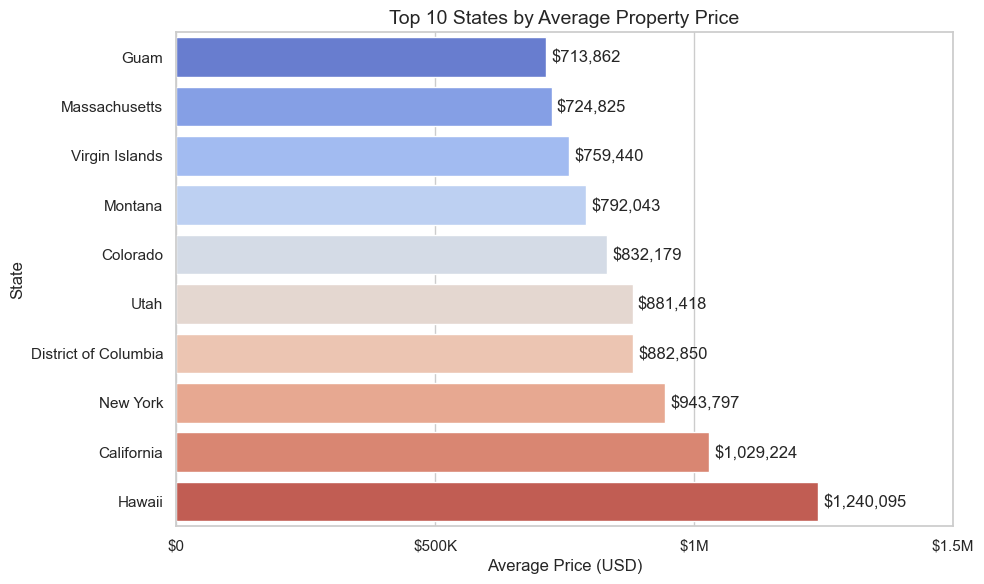

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame manually
state_price_df = pd.DataFrame({
    "state": [
        "Hawaii", "California", "New York", "District of Columbia", "Utah",
        "Colorado", "Montana", "Virgin Islands", "Massachusetts", "Guam"
    ],
    "avg_price": [
        1240095.30, 1029223.70, 943796.82, 882849.78, 881418.40,
        832179.28, 792043.24, 759440.05, 724824.71, 713861.66
    ]
})
# Sort for clean display
state_price_df = state_price_df.sort_values(by="avg_price", ascending=True)

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="avg_price",
    y="state",
    data=state_price_df,
    palette="coolwarm"
)

plt.title("Top 10 States by Average Property Price", fontsize=14)
plt.xlabel("Average Price (USD)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.xticks(
    ticks=[0, 500000, 1000000, 1500000],
    labels=["$0", "$500K", "$1M", "$1.5M"]
)

# Annotate bar values
for index, value in enumerate(state_price_df["avg_price"]):
    plt.text(value + 10000, index, f"${value:,.0f}", va='center')

plt.tight_layout()
plt.show()


In [89]:
# Average price per city (top 10 within the most common state, e.g., Florida)
# Find the most common state first
most_common_state = df['state'].mode()[0]
print(f"\nAverage Price per City (Top 10 in {most_common_state}):")
avg_price_city_in_state = df[df['state'] == most_common_state].groupby('city')['price'].mean().sort_values(ascending=False).head(10)
print(avg_price_city_in_state.apply(lambda x: f"${x:,.2f}"))



Average Price per City (Top 10 in Florida):
city
Manalapan               $18,894,768.88
Golden Oak              $16,385,000.00
Golden Beach            $13,548,333.33
Gulf Stream             $12,116,750.00
Jupiter Inlet Colony    $11,728,800.00
Palm Beach               $9,138,875.16
Belleair Shores          $8,500,000.00
Point Washington         $7,282,475.00
Kenansville              $6,219,985.45
Fisher Island            $6,006,250.00
Name: price, dtype: object


C:\Users\hp\AppData\Local\Temp\ipykernel_10824\1441650535.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


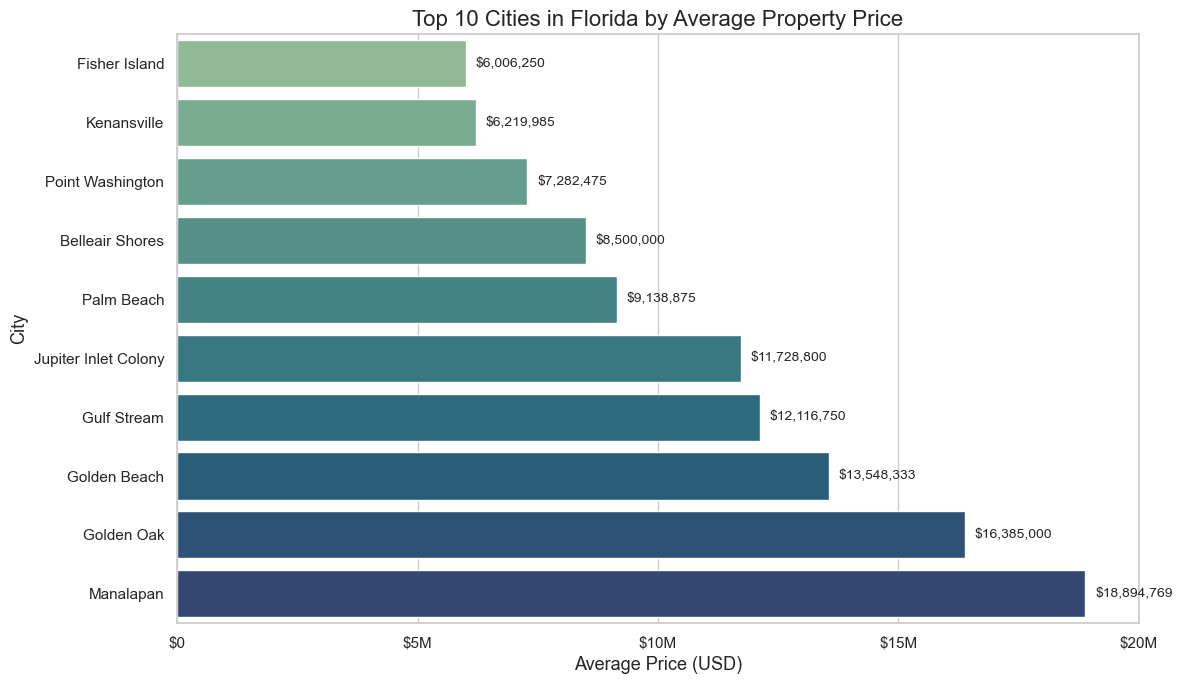

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
city_price_df = pd.DataFrame({
    "city": [
        "Manalapan", "Golden Oak", "Golden Beach", "Gulf Stream", "Jupiter Inlet Colony",
        "Palm Beach", "Belleair Shores", "Point Washington", "Kenansville", "Fisher Island"
    ],
    "avg_price": [
        18894768.88, 16385000.00, 13548333.33, 12116750.00, 11728800.00,
        9138875.16, 8500000.00, 7282475.00, 6219985.45, 6006250.00
    ]
})
# Sort by avg_price
city_price_df = city_price_df.sort_values(by="avg_price", ascending=True)

# Style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    x="avg_price",
    y="city",
    data=city_price_df,
    palette="crest"
)

plt.title("Top 10 Cities in Florida by Average Property Price", fontsize=16)
plt.xlabel("Average Price (USD)", fontsize=13)
plt.ylabel("City", fontsize=13)
plt.xticks(
    ticks=[0, 5000000, 10000000, 15000000, 20000000],
    labels=["$0", "$5M", "$10M", "$15M", "$20M"]
)

# Add text labels on bars
for index, value in enumerate(city_price_df["avg_price"]):
    plt.text(value + 200000, index, f"${value:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()
